In [80]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [81]:
df = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv", header=4)

In [82]:
df = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv", header=4)
# data cleaning

df['Population'] = df['Population'].str.replace(',', '')
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')

df['Population'] = pd.to_numeric(df['Population'])
df['Population'] = df['Population']
df['Property crime'] = pd.to_numeric(df['Property\ncrime'])

df = df.drop([348, 349, 350])
df.fillna(0)
df['Robbery'] = pd.to_numeric(df['Robbery'])

In [83]:
# Creates features with Murder & Robbery > 1  being True with 1 and False 0 
df['Murder'] = (df['Murder and\nnonnegligent\nmanslaughter'] == 0)
df['Robbery_x'] = (df['Robbery'] == 0)
df['Murder'] = pd.get_dummies(df['Murder'])
df['Robbery_x'] = pd.get_dummies(df['Robbery_x'])
df['Pop_squared'] = df['Population']**2

#Created a Logrithmic Properity crime feature that helped property crime become more linear

df.iloc[df.loc[df['Property crime']==0].index, df.columns.get_loc('Property crime')] = 1
# df.iloc[0, df.columns.get_loc('COL_NAME')] = x
df['Property crime_2'] = np.log(df['Property crime'].astype('float64'))

In [57]:
# df.loc[df['Property crime']==0]
# df = df.drop(index=df.loc[df['Property crime']==0].index)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Property crime,Murder,Robbery_x,Pop_squared,Property crime_2


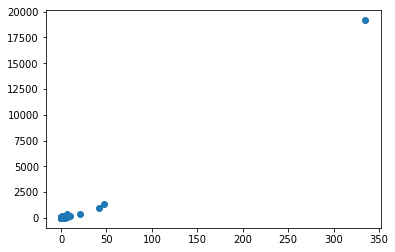

In [58]:
plt.scatter(df['Murder and\nnonnegligent\nmanslaughter'], df['Robbery'])
plt.show()

In [87]:
df['Robbery'].describe()

count      348.000000
mean        72.902299
std       1031.032873
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max      19170.000000
Name: Robbery, dtype: float64

In this model I dropped the outliner since its values were significantly higher than all the others.  It is unclear what this geography is - NYC totals?  The parts of NYC not associated with a neighborhood?  

In [88]:
df.iloc[216]

City                                         New York
Population                                8.39613e+06
Violent\ncrime                                 52,384
Murder and\nnonnegligent\nmanslaughter            335
Rape\n(revised\ndefinition)1                      NaN
Rape\n(legacy\ndefinition)2                     1,112
Robbery                                         19170
Aggravated\nassault                            31,767
Property\ncrime                                141971
Burglary                                       16,606
Larceny-\ntheft                               117,931
Motor\nvehicle\ntheft                           7,434
Arson3                                            NaN
Property crime                                 141971
Murder                                              1
Robbery_x                                           1
Pop_squared                               7.04949e+13
Property crime_2                              11.8634
Name: 216, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

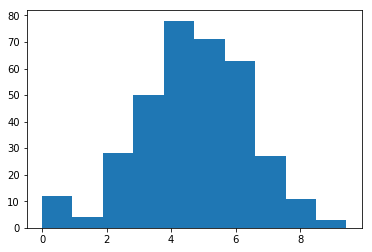

In [90]:
# drop NYC outlier
df = df.drop(index=216)

df['Property crime_2'].sort_values()
plt.hist(df['Property crime_2'])
plt.show

In [91]:
from sklearn import linear_model
import statsmodels.formula.api as smf
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime']
# X = df[['Population','Pop_squared','Murder', 'Robbery_x']]
X = df[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1.58346761e-02 1.18435972e+02 2.02490402e+00]

Intercept: 
 25.2447104393612

R-squared:
0.9305591974235127


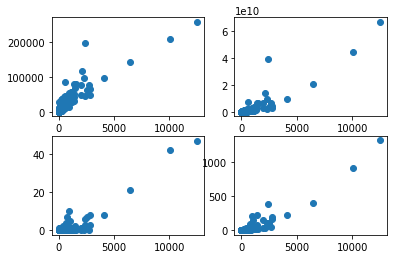

In [93]:
# Testing the model
# Linear Relationships

f, axarr = plt.subplots(2,2)
axarr[0,0].scatter(df['Property crime'], df['Population'])
axarr[0,1].scatter(df['Property crime'], df['Pop_squared'])
axarr[1,0].scatter(df['Property crime'], df['Murder and\nnonnegligent\nmanslaughter'])
axarr[1,1].scatter(df['Property crime'], df['Robbery'])

# axarr[0,0].scatter(df['Property crime_2'], df['Population'])
# axarr[0,1].scatter(df['Property crime_2'], df['Pop_squared'])
# axarr[1,0].scatter(df['Property crime_2'], df['Murder'])
# axarr[1,1].scatter(df['Property crime_2'], df['Robbery_x'])


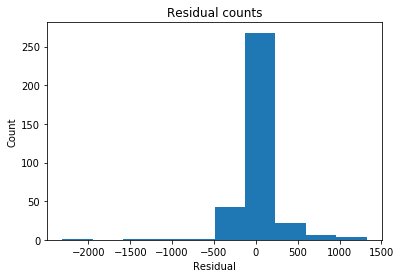

count    3.470000e+02
mean    -2.424446e-14
std      2.725713e+02
min     -2.310795e+03
25%     -6.261131e+01
50%     -3.112389e+01
75%      4.266069e+01
max      1.325739e+03
Name: Property crime, dtype: float64

In [94]:
# multivariate normality
predicted = regr.predict(X).ravel()
actual = df['Property crime']
# actual = df['Property crime_2']

# Calculate the residual
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
residual.describe()

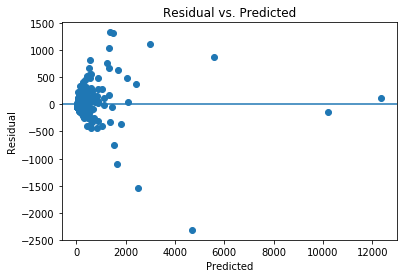

In [95]:
# homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [96]:
# multicollinearity

correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Murder and nonnegligent manslaughter,Robbery
Population,1.000000,0.756401,0.815525
Murder and\nnonnegligent\nmanslaughter,0.756401,1.000000,0.963290
Robbery,0.815525,0.963290,1.000000


Took a stab at this model as prescribed in the earlier lesson - Property crime = Population + Pop Squared + Murder (cat.) + Robbery (cat.).  Found some multcollinearity with the population figures so I dropped Pop Squared.  Also the categorical Murder and Robbery figures didn't really give the model much extra information so I used the continous figures for Murder\nonnegligent\manslaughter and Robbery.  Also dropped the largest city - NYC - as this outlier had so much affect on the model that it actually overfit the model.  

The result produced a model with an R-squared of ~ 0.93, linear relationships and low multicollinearity.